In [495]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [496]:
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Funciones de carga de Datos, Slicing y comparación de errores de modelos

In [497]:
###función para cargar los datos y generar el dataframe ya revuelto usando Pandas
def CargaDatos():
    TrainingData = np.load('proyecto_training_data.npy')
    DataRegression = pd.DataFrame(TrainingData,columns =['SalePrice','OveralQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
    DataRegression = DataRegression.sample(frac = 1, ignore_index=True)
    DataTrain = DataRegression[:int(len(DataRegression)*0.8)]
    DataTest = DataRegression[int(len(DataRegression)*0.8):len(DataRegression)]
    #DataTrain = DataRegression.iloc[0:int(len(DataRegression)*.8),:]
    #DataTest = DataRegression.iloc[int(len(DataRegression)*0.8):len(DataRegression), : ]
    

    return DataRegression, DataTrain, DataTest

In [498]:
### Función para los parámetros de la exploración
def ParametrosDatos(b):
    a = b.describe()
    MediasData = a.loc['mean']
    MaxData = a.loc['max']
    MinData = a.loc['min']
    StdData = a.loc['std']
    RangeData = a.loc['max'] - a.loc['min']
    return MediasData, MaxData, MinData, StdData, RangeData

In [499]:
### Función para predicciones con modelos con errores
def PredicModelos(coef1,inter1,coef2,inter2,Xpruebas,Ypruebas):
    Ypruebas = Ypruebas.to_numpy().reshape(-1,1)
    Xpruebas = Xpruebas.to_numpy().reshape(-1,1)
    CoefMano = coef1
    InterMano = inter1
    CoefScikit = coef2
    InterScikit = inter2
    CoefProm = (CoefMano + CoefScikit)/2
    InterProm = (InterMano + InterScikit)/2
    YPredictMano = Xpruebas*CoefMano + InterMano
    YPredictProm = Xpruebas*CoefProm + InterProm
    YScikit = Xpruebas*CoefScikit + InterScikit
    ErrorManual = np.power(Ypruebas - YPredictMano,2)
    ErrorProm = np.power(Ypruebas - YPredictProm,2)    
    ErrorScikit = np.power(Ypruebas - YScikit,2)
    EQMManual = np.mean(ErrorManual)
    EQMProm = np.mean(ErrorProm)
    EQMScikit = np.mean(ErrorScikit)
    EQMS = {'ErrorCuadMedio_Manual': EQMManual, 'ErrorCuadMedio_Promedio': EQMProm, 'ErrorCuadMedio_Scikit' : EQMScikit}
    dfPredict = pd.DataFrame(np.column_stack([Ypruebas,YPredictMano,YPredictProm,YScikit]),columns = ['YReal','YPredictManual','YPredictProm','YPredictScikit'])
    dfErrores = pd.DataFrame(np.column_stack([ErrorManual,ErrorProm,ErrorScikit]),columns=['ErrorManual','ErrorPromedio','ErrorScikit'])
    return dfPredict, dfErrores, EQMS


In [500]:
## Main del programa
DatosProyecto, DatosEntreno, DatosPruebas = CargaDatos() #carga los datos completos, el 80% para entrenamiento y el 20% para pruebas
# Se generan 3 Data Frame, uno con los datos totales, otro con los de entreno y otro con los de pruebas.
MediaDatos, MaxDatos, MinDatos, StdDatos, RangoDatos = ParametrosDatos(DatosEntreno)


## Exploración de datos

### Obtención de parámetros generales del bloque completo de datos

In [501]:
print (f'Media de los datos:\n{MediaDatos}')

Media de los datos:
SalePrice       180964.048801
OveralQual           6.092466
1stFlrSF          1167.783390
TotRmsAbvGrd         6.511130
YearBuilt         1971.249144
LotFrontage         69.724818
Name: mean, dtype: float64


In [502]:

print (f'Desviación de los datos:\n{StdDatos}')

Desviación de los datos:
SalePrice       78344.882471
OveralQual          1.380490
1stFlrSF          394.226059
TotRmsAbvGrd        1.587725
YearBuilt          30.193158
LotFrontage        23.429331
Name: std, dtype: float64


In [503]:
print (f'Valores máximos de los datos:\n{MaxDatos}')

Valores máximos de los datos:
SalePrice       755000.0
OveralQual          10.0
1stFlrSF          4692.0
TotRmsAbvGrd        12.0
YearBuilt         2010.0
LotFrontage        313.0
Name: max, dtype: float64


In [504]:
print (f'Valores mínimos de los datos:\n{MinDatos}')

Valores mínimos de los datos:
SalePrice       34900.0
OveralQual          1.0
1stFlrSF          334.0
TotRmsAbvGrd        2.0
YearBuilt        1875.0
LotFrontage        21.0
Name: min, dtype: float64


### Histograma de las variables en el set de entrenamiento

<Figure size 640x480 with 0 Axes>

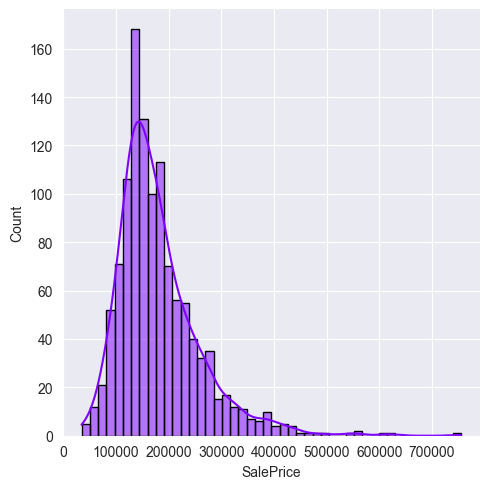

<Figure size 640x480 with 0 Axes>

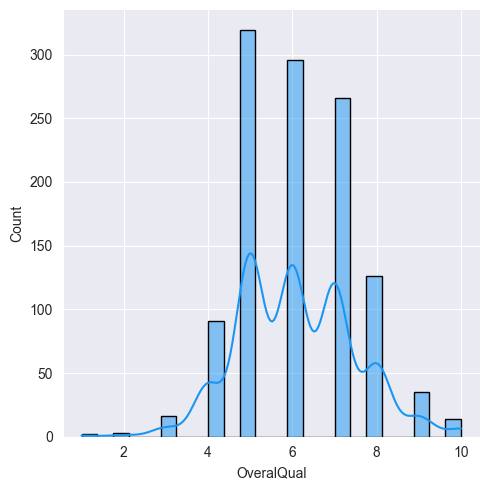

<Figure size 640x480 with 0 Axes>

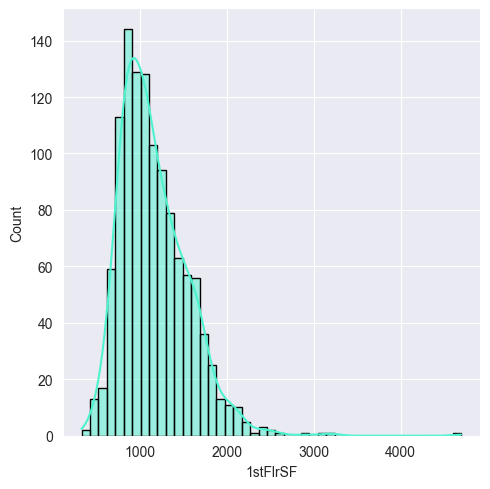

<Figure size 640x480 with 0 Axes>

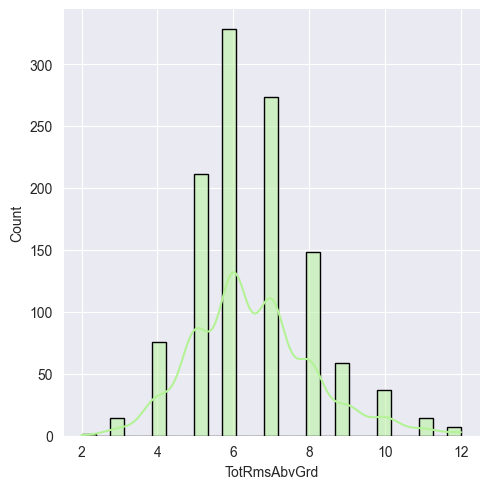

<Figure size 640x480 with 0 Axes>

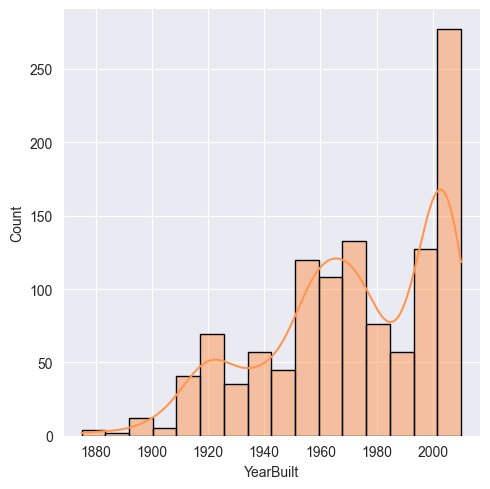

<Figure size 640x480 with 0 Axes>

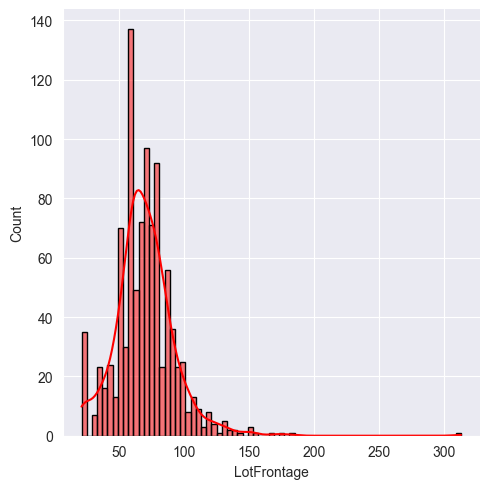

In [527]:
ColorHist = cm.rainbow(np.linspace(0,1,(DatosEntreno.shape[1])))
sb.set_style('darkgrid')
Ban = 0
for column in DatosEntreno:
    plt.figure()
    sb.displot(DatosEntreno[column], kde = True, color = ColorHist[Ban], linewidth = 1, edgecolor = '0')
    Ban = Ban + 1

### Calcular el coeficiente de correlación de cada variable del set de entrenamiento


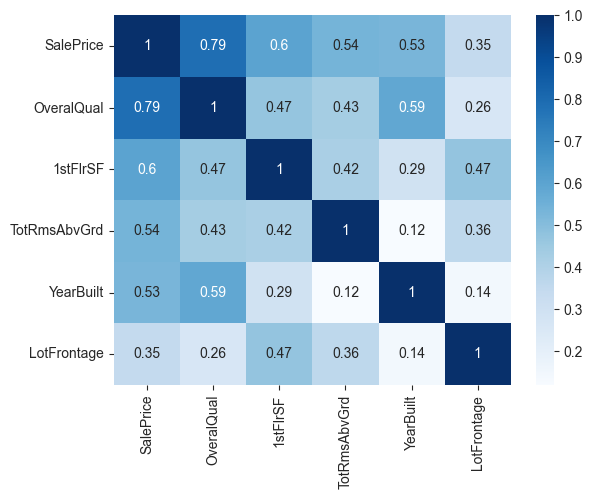

In [506]:
plt.figure()
correlacones = DatosEntreno.corr()
GrafiCorr = sb.heatmap(correlacones, annot = True, cmap = 'Blues',fmt = '0.2g')

### Scatterplot con Correlación como título para el set de entrenamiento

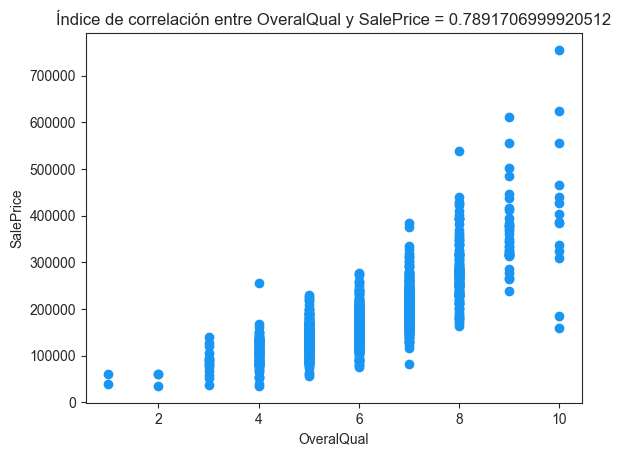

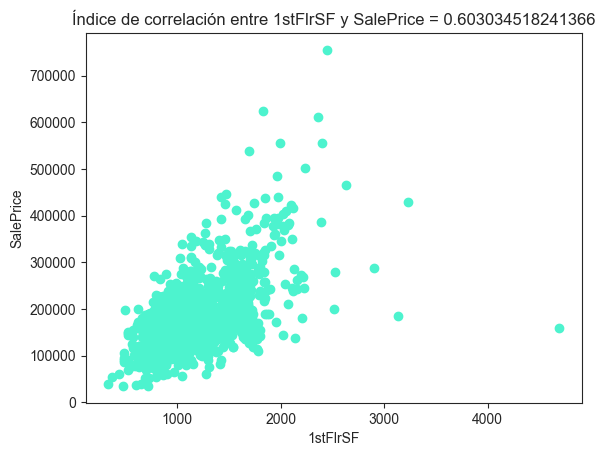

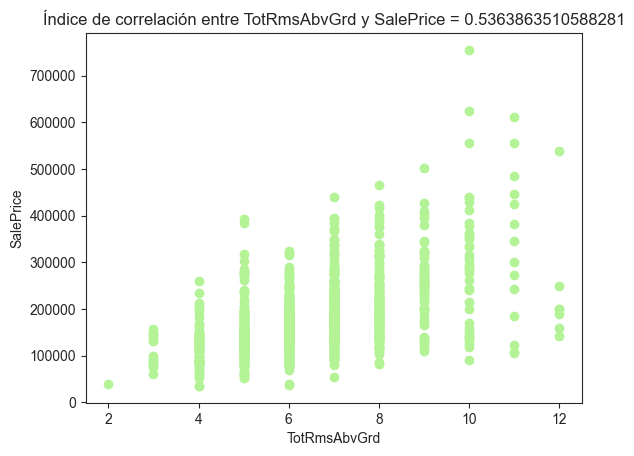

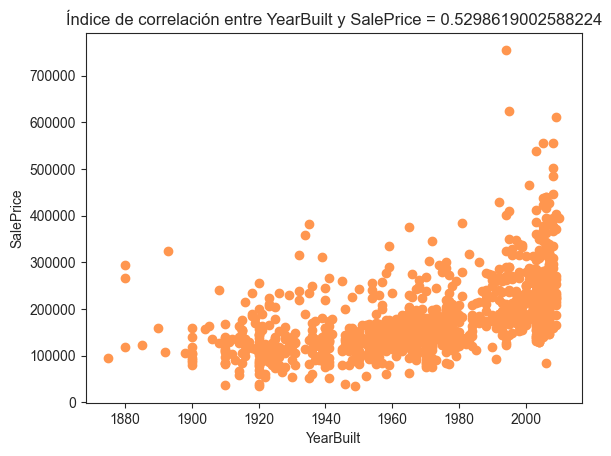

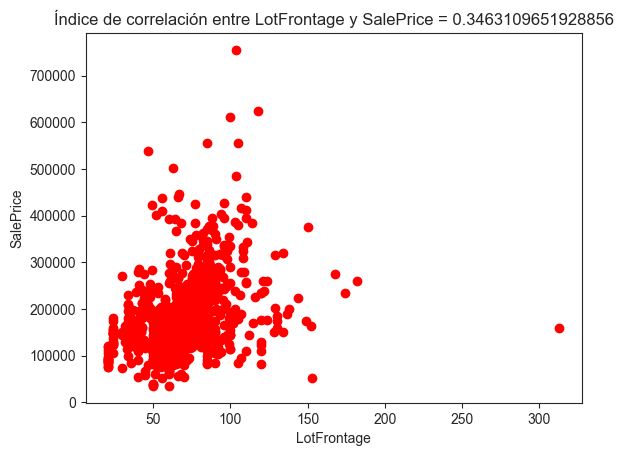

In [507]:
CorrPrecio = DatosEntreno.corr()['SalePrice']
colores = cm.rainbow(np.linspace(0,1,len(CorrPrecio)))
Bandera = 0
for value in DatosEntreno:
    if value != 'SalePrice':
        plt.figure()
        plt.title(f'Índice de correlación entre {value} y SalePrice = {CorrPrecio[Bandera]}')
        plt.xlabel(value)
        plt.ylabel('SalePrice')
        plt.scatter(DatosEntreno[value],DatosEntreno['SalePrice'], color = colores[Bandera])
    Bandera = Bandera + 1
        

## Clase para modelo

In [508]:
class RegLin():
    ### generador de objeto
    def __init__(self, epochs, LearnRate, xData, yData, print_itr):
        self.epochs = epochs
        self.LearningRate = LearnRate
        self.x = xData
        self.y = yData
        self.FinalY = []
        self.print_iters = print_itr
        self.beta0 = 0
        self.beta1 = 0
        self.HistoricBetas = []
        self.HistoricError = []
        self.iter = []
    ### Método para regresion   
    def MetodoReg(self):
        self.beta1 = 0.001
        self.beta0 = 0.001
        yOriginal = self.y.to_numpy().reshape(-1,1)
        self.FinalY = []
        self.HistoricBetas = []
        self.HistoricError = []
        self.iter = []
        x = self.x.to_numpy().reshape(-1,1)
        ones = np.ones_like(x)
        ones = ones.reshape(-1,1)
        Vec = np.hstack([x,ones])
        betas = np.array([self.beta1,self.beta0]).reshape(-1,1)
        self.HistoricBetas.append([self.beta1,self.beta0])
        for index in range (self.epochs):
            result = np.dot(Vec,betas)
            error = 0.5*np.mean(np.power((result-yOriginal),2))
            DelBeta1 = np.mean((result - yOriginal)*x)
            DelBeta0 = np.mean(result - yOriginal)
            self.beta1 = self.beta1 - self.LearningRate*DelBeta1
            self.beta0 = self.beta0 - self.LearningRate*DelBeta0
            betas = np.array([self.beta1,self.beta0]).reshape(-1,1)
            self.HistoricError.append(error)
            self.iter.append(index)
            self.HistoricBetas.append(np.array([self.beta1,self.beta0]))
        self.YFinal = self.beta1*x + self.beta0
    #### Método para graficar el error total
    def PlotError(self):
        plt.figure()
        plt.title('Gráfica error modelo')
        plt.xlabel('Iteraciones')
        plt.ylabel('Error')
        plt.plot(self.iter,self.HistoricError, color = 'green')
    #### Método para graficar el modelo vs scatterplot
    def PlotModelo(self):
        GraphModelo = plt.figure()
        plt.title(f'Modelo de regresión y = {round(self.beta1,3)}x + {round(self.beta0,3)}')
        plt.xlabel(f'Variable independiente {self.x.name}')
        plt.ylabel(f'Variable dependiente {self.y.name}')
        plt.scatter(self.x.to_numpy().reshape(-1,1),self.y.to_numpy().reshape(-1,1))
        plt.plot(self.x.to_numpy().reshape(-1,1),self.YFinal, color = 'red')
    ### Método para graficar evolución de función
    def PlotEvo(self):
        ValueBan = 1
        while(ValueBan <= int(self.epochs/self.print_iters)):
            print(ValueBan*self.print_iters-1)
            
            ytemp = self.x.to_numpy().reshape(-1,1)*self.HistoricBetas[(ValueBan*self.print_iters-1)][0] + self.HistoricBetas[(ValueBan*self.print_iters-1)][1]
            plt.figure()
            plt.title(f'Iteración No.{ValueBan*self.print_iters}, error = {round(self.HistoricError[ValueBan*self.print_iters -1],4)}')
            plt.xlabel(f'Variable independiente {self.x.name}')
            plt.ylabel(f'Variable dependiente {self.y.name}')
            plt.scatter(self.x.to_numpy().reshape(-1,1),self.y.to_numpy().reshape(-1,1))
            plt.plot(self.x.to_numpy().reshape(-1,1),ytemp, color = 'red')
            ValueBan = ValueBan +1
            

## Pruebas con dos variables independientes

#### Declaración de objetos

In [509]:
Modelo1stFlr = RegLin(7000,0.000001,DatosEntreno['1stFlrSF'],DatosEntreno['SalePrice'],3000)
ModeloOveralqual = RegLin(5000,0.01,DatosEntreno['OveralQual'],DatosEntreno['SalePrice'],3000)

#### Predicciónd de parámetros de cada uno

In [510]:
Modelo1stFlr.MetodoReg()
ModeloOveralqual.MetodoReg()

#### Gráficas de Modelo variable independiente 1stFlr

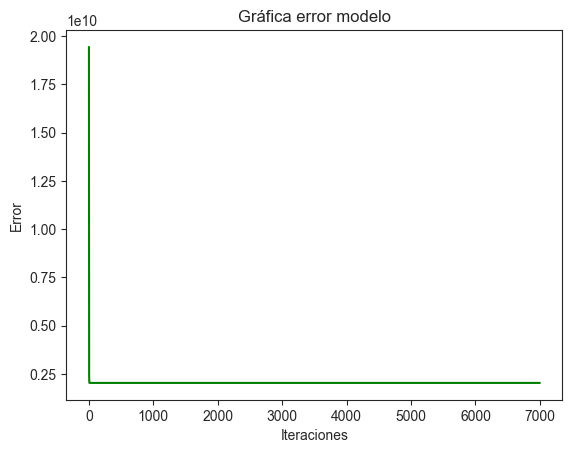

In [511]:
Modelo1stFlr.PlotError()

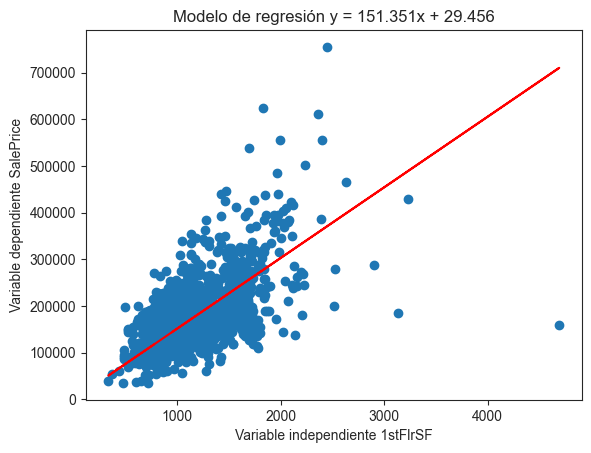

In [512]:
Modelo1stFlr.PlotModelo()

2999
5999


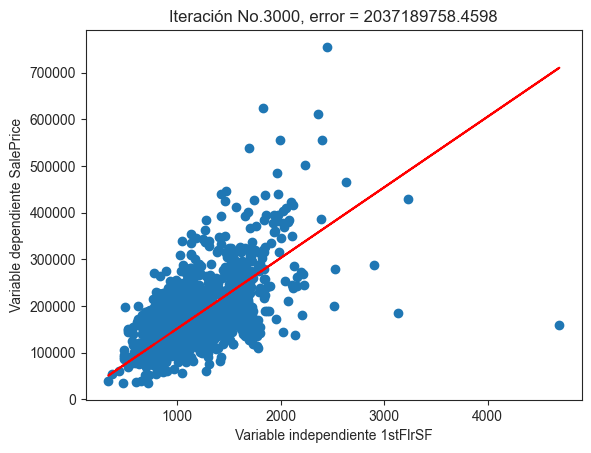

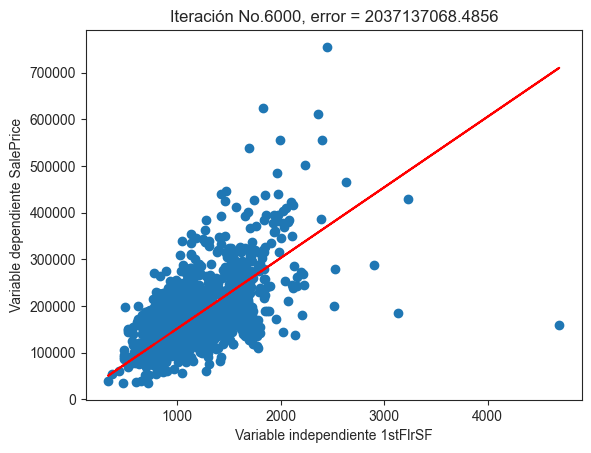

In [513]:
Modelo1stFlr.PlotEvo()

#### Gráficas de modelo con variable dependiente OveralQual

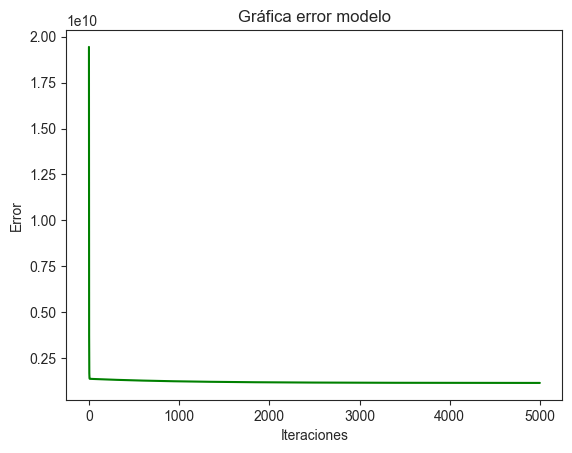

In [514]:
ModeloOveralqual.PlotError()

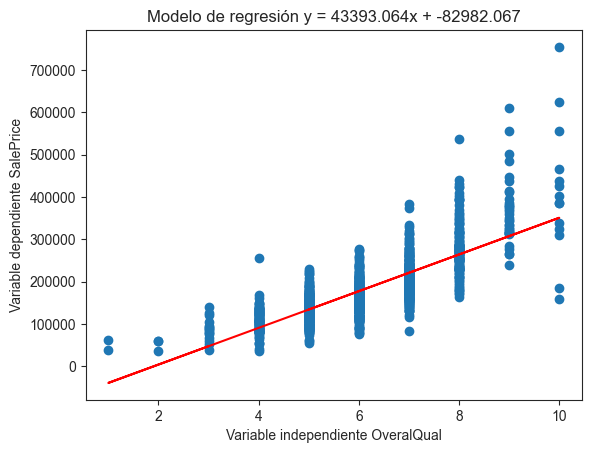

In [515]:
ModeloOveralqual.PlotModelo()

2999


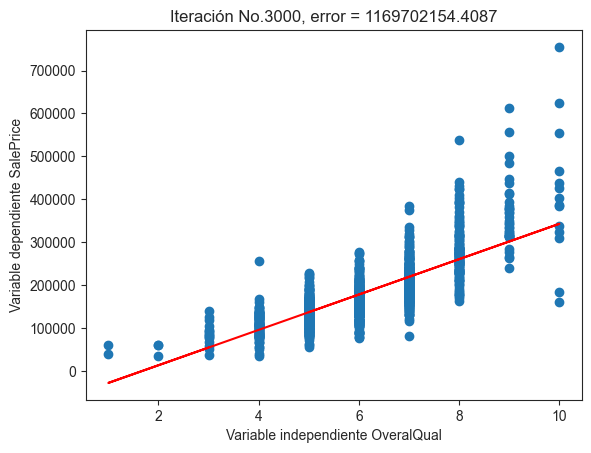

In [516]:
ModeloOveralqual.PlotEvo()


## Pruebas con scikit-learn

In [517]:
### Definiendo variables independientes
x1 = np.array(DatosEntreno['OveralQual']).reshape(-1,1)
x2 = np.array(DatosEntreno['1stFlrSF']).reshape(-1,1)
y = np.array(DatosEntreno['SalePrice']).reshape(-1,1)

In [518]:
Reg1 = LinearRegression()
Reg1.fit(x1,y)
print(Reg1.score(x1,y))

0.6227903937259432


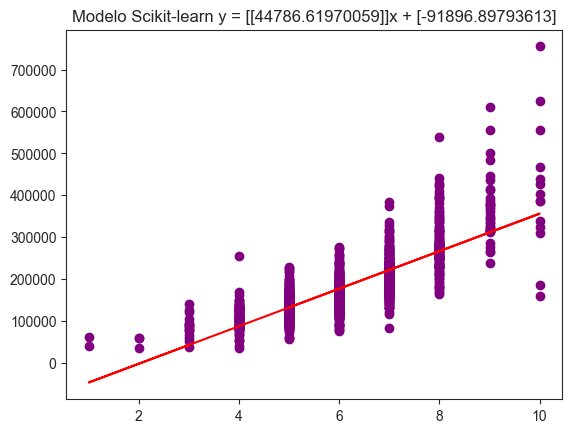

In [519]:
ytest = Reg1.predict(x1)
plt.scatter(x1,y, color = 'purple')
plt.plot(x1,ytest, color = 'red')
plt.title(f'Modelo Scikit-learn y = {Reg1.coef_}x + {Reg1.intercept_}')
plt.show()

In [520]:
Reg2 = LinearRegression()
Reg2.fit(x2,y)
print(Reg2.score(x2,y))

0.3636506301905954


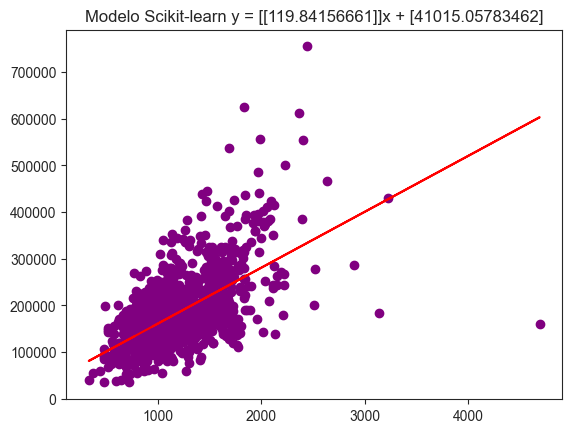

In [521]:
ytest = Reg2.predict(x2)
plt.scatter(x2,y, color = 'purple')
plt.plot(x2,ytest, color = 'red')
plt.title(f'Modelo Scikit-learn y = {Reg2.coef_}x + {Reg2.intercept_}')
plt.show()

### Obteniendo errores

{'ErrorCuadMedio_Manual': 2578760478.2798033, 'ErrorCuadMedio_Promedio': 2566457735.175611, 'ErrorCuadMedio_Scikit': 2556109202.5584717}


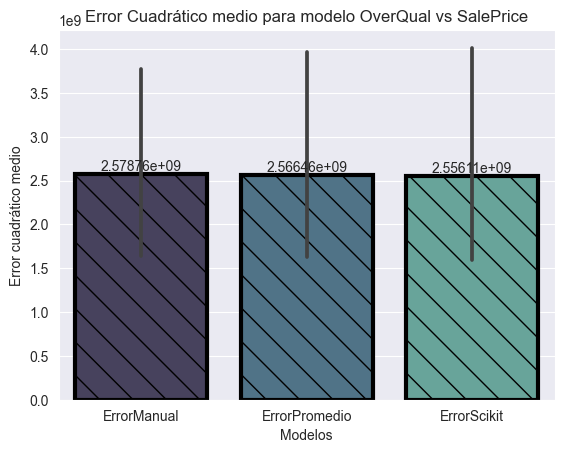

In [534]:
### Datos del modelo OveralQual vs Saleprice
PrediccionesOQual,ErroresOQual, EQMQual = PredicModelos(ModeloOveralqual.beta1,ModeloOveralqual.beta0,Reg1.coef_,Reg1.intercept_,DatosPruebas['OveralQual'],DatosPruebas['SalePrice'])
print(EQMQual)
sb.set_style('darkgrid')
plt.title(f'Error Cuadrático medio para modelo OverQual vs SalePrice')
plt.xlabel('Modelos')
plt.ylabel('Error cuadrático medio')
ax1 = sb.barplot(data = ErroresOQual, edgecolor = '0',linewidth = 3, palette = 'mako', saturation = 0.5, hatch = '\\')
for i in ax1.containers:
    ax1.bar_label(i,)


{'ErrorCuadMedio_Manual': 4321975812.086104, 'ErrorCuadMedio_Promedio': 4307178404.043395, 'ErrorCuadMedio_Scikit': 4366984324.779979}


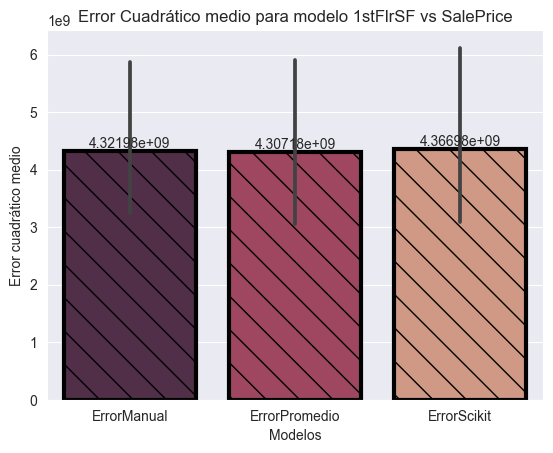

In [535]:
## Datos del modelo 1stFlrSF vs SAleprice
Pred1stFSF, Errores1stFSF, EQM1stFSF = PredicModelos(Modelo1stFlr.beta1,Modelo1stFlr.beta0,Reg2.coef_,Reg2.intercept_,DatosPruebas['1stFlrSF'],DatosPruebas['SalePrice'])
print(EQM1stFSF)
sb.set_style('darkgrid')
plt.title(f'Error Cuadrático medio para modelo 1stFlrSF vs SalePrice')
plt.xlabel('Modelos')
plt.ylabel('Error cuadrático medio')
ax2 = sb.barplot(data = Errores1stFSF, edgecolor = '0',linewidth = 3, palette = 'rocket', saturation = 0.5, hatch = '\\')
for i in ax2.containers:
    ax2.bar_label(i,)